In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv('7817_1.csv')
data.head()

id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
3  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
4  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   

  reviews.rating                                 reviews.sourceURLs  \
0            5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
1            5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
2            4.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
3            5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
4            5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   

                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                reviews.title reviews.userCity  \
0              Paperwhite voyage, no regrets!              NaN   
1           One Simply Could Not Ask For More              NaN   
2  Great for those that just want an e-reader              NaN   
3                    Love / Hate relationship              NaN   
4                                   I LOVE IT              NaN   

  reviews.userProvince    reviews.username  sizes upc     weight  
0                  NaN          Cristina M    NaN NaN  205 grams  
1                  NaN               Ricky    NaN NaN  205 grams  
2                  NaN       Tedd Gardiner    NaN NaN  205 grams  
3                  NaN              Dougal    NaN NaN  205 grams  
4                  NaN  Miljan David Tanic    NaN NaN  205 grams  

[5 rows x 27 columns]

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [3]:
df2 = data[['brand', 'reviews.rating', 'reviews.text']]


In [4]:
df2.head()

brand  reviews.rating                                       reviews.text
0  Amazon             5.0  I initially had trouble deciding between the p...
1  Amazon             5.0  Allow me to preface this with a little history...
2  Amazon             4.0  I am enjoying it so far. Great for reading. Ha...
3  Amazon             5.0  I bought one of the first Paperwhites and have...
4  Amazon             5.0  I have to say upfront - I don't like coroporat...

In [5]:
df2.isnull().sum()

brand               0
reviews.rating    420
reviews.text        0
dtype: int64

In [6]:
df2['reviews.rating']=df2['reviews.rating'].fillna(df2['reviews.rating'].median())

C:\Users\vamsh\AppData\Local\Temp\ipykernel_12868\3351664575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews.rating']=df2['reviews.rating'].fillna(df2['reviews.rating'].median())


In [7]:
df2.isnull().sum()

brand             0
reviews.rating    0
reviews.text      0
dtype: int64

In [8]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["reviews.text"] = data["reviews.text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vamsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
ratings = df2["reviews.rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(df2, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

So 72.7% of the reviewers have given 5 out of 5 ratings to the products they buy from Amazon. Now let’s have a look at the kind of reviews people leave. For this, I will use a word cloud to visualize the most used words in the reviews column:

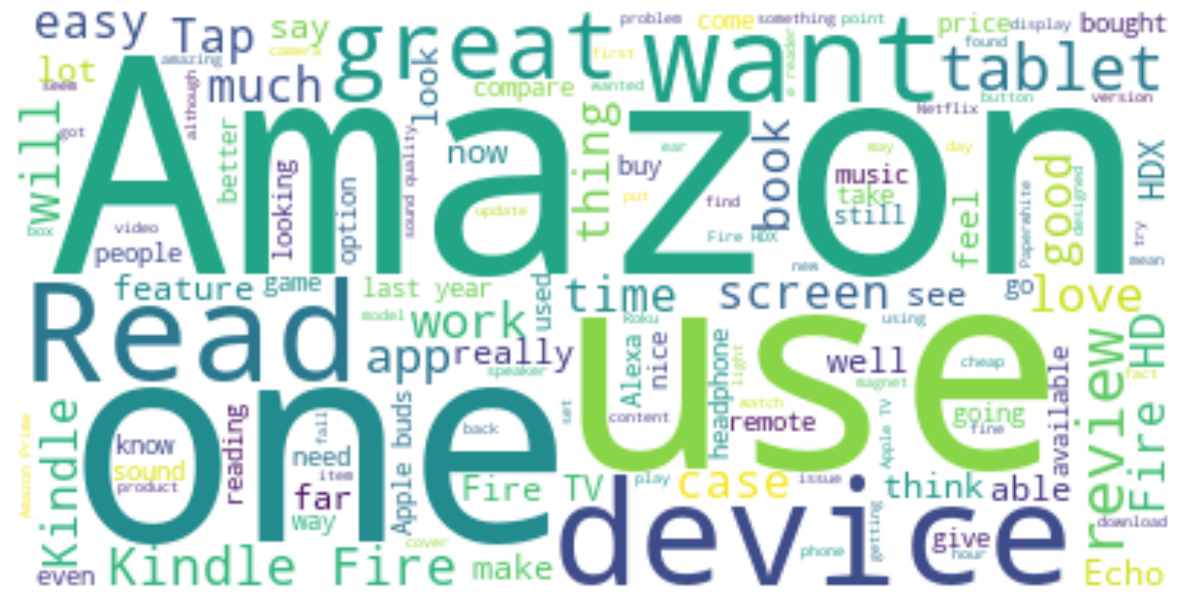

In [10]:
text = " ".join(i for i in df2['reviews.text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will analyze the sentiments of Amazon reviews by adding three columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews

In [11]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df2["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df2["reviews.text"]]
df2["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df2["reviews.text"]]
df2["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df2["reviews.text"]]
df2 = df2[["reviews.text", "Positive", "Negative", "Neutral"]]
print(df2.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vamsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\vamsh\AppData\Local\Temp\ipykernel_12868\2359833565.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vamsh\AppData\Local\Temp\ipykernel_12868\2359833565.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                                        reviews.text  Positive  Negative  \
0  I initially had trouble deciding between the p...     0.169     0.038   
1  Allow me to preface this with a little history...     0.147     0.041   
2  I am enjoying it so far. Great for reading. Ha...     0.223     0.181   
3  I bought one of the first Paperwhites and have...     0.105     0.030   
4  I have to say upfront - I don't like coroporat...     0.195     0.089   

   Neutral  
0    0.793  
1    0.812  
2    0.596  
3    0.865  
4    0.715  


C:\Users\vamsh\AppData\Local\Temp\ipykernel_12868\2359833565.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
x = sum(df2["Positive"])
y = sum(df2["Negative"])
z = sum(df2["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂")
sentiment_score(x, y, z)

Neutral 🙂


In [13]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  321.6280000000016
Negative:  67.30699999999999
Neutral:  1208.0520000000022
